# Machine Learning for Sepsis Pathway 

## Plotting Notebook. 

Setup Libraries and plotting defaults. 

In [1]:
import sys
import os
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
#import statsmodels.formula.api as smf
#from statsmodels.stats.anova import anova_lm


import re
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from pandasql import sqldf
import sqlalchemy
import pyodbc

import dfply as dfp
from dfply import *

import datetime
from datetime import *

import pyodbc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

import forestci as fci

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
import xgboost as xgb
from imblearn.over_sampling import SMOTENC
n_est=55

from hyperopt.pyll import scope
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

pd.set_option('display.max_columns', None)


import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow ','GENDERCODE_Male':'Sex - Male','GENDERCODE_Unknown':'Sex - Unknown',
               'GENDERCODE_Indeterminate':'Sex - Indeterminate'
               }


plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(50,20,110,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 8,10),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),
        
        'FirstO2Flow':(20,0,20,'log',r"O$_{2}$ Flow", True,0,5),
        'FirstPulseRateBPM':(50,0,200,'log','Pulse Rate',True,60,100),
        'FirstSpO2':(50,0,100,'log',r"O$_{2}$ Saturation [%]",True,94,100),
         'FirstRespiration':(20,0,40,'log','Respiration Rate',True,10,21),
         'FirstLevelofConsciousness':(4,-0.5,3.5,'log',"Level of Consciousness",True,-0.5,2),
        'FirstGCSScoreAdult':(16,-0.5,15.5,'log','Glasgow Coma Scale',False,0,0)
        
        }


Failed to import duecredit due to No module named 'duecredit'


# Settings for Machine Learning Model 

# Load Data Files 

In [2]:

start_date =  '2023-01-01'  #dates[Facility][0]
end_date   =  '2024-01-01' #dates[Facility][1]

select_start_date = '2023-01-01'

DataReasons = "Training"

Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)

DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_2023-01-01_2024-01-01_Training_Stage_01.pkl


In [3]:
importlib.reload(MLUtilities)
Emergency_IPInfo_Complete_Numeric = MLUtilities.setNumeric(Emergency_IPInfo_Complete_Numeric)

# Setup Machine Learning Information 

In [4]:
# # Sepsis HeartFailure PE Pneumonia COPD UTI
# # SepsisPneumonia
Diagnosis =   "Sepsis"
# # Diagnosis = 'SepsisPneumonia'
# Diagnosis = 'Admission'
# Diagnosis = 'GenMed'

DiagnosisString=Diagnosis+'Flag'

# DataSet1 All observations 
# DataSet2 Not including Oxygen Flow 
# Dataset3  Dataset2 plus age and gender
#  Dataset4 3 plus restriction on TC to 3 4 and 5 
#  Dataset 3 with LoS > 6 hours. 



DataSet = 'DataSet30'




In [5]:
Emergency_IPInfo_Complete_Numeric.IndiginousStatus.unique()

array(['Not Aboriginal-TSI', 'Not Stated', 'Aboriginal',
       'Aboriginal and TSI', 'TSI', None], dtype=object)

In [6]:
Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)

Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1

In [7]:


GenMedList = ['LMH-LGMED','LMH-LAMU',
              "MPH-MGMED", 
              "FMC-GENMED",
              "NHS-GENMED",
              "RAH-GENMED",
              "QEH-GENMED", 'QEH-GM-AMU'
              ]
# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

if Diagnosis == 'Admission':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>24), DiagnosisString] = 1
    
    if DataSet == 'DataSet5':
        Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1


if Diagnosis == 'GenMed':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    for g in GenMedList:
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


Diagnosis being investigated = SepsisFlag
Total Number of Cases = 320013
Number of SepsisFlag Cases  2761


In [9]:
Data_Storage_File = 'ED_Visits_EMR_2023_EDVisits_Summary_df.pkl'  #.format(Facility)
print(Data_Storage_File)

# with open(Data_Storage_File, 'wb') as file:  
#     pickle.dump(EDVists_Summary_df, file)

with open(Data_Storage_File, 'rb') as file:
    EDVists_Summary_df = pd.read_pickle(file)

ED_Visits_EMR_2023_EDVisits_Summary_df.pkl


In [10]:
tmp_df  = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1].copy()

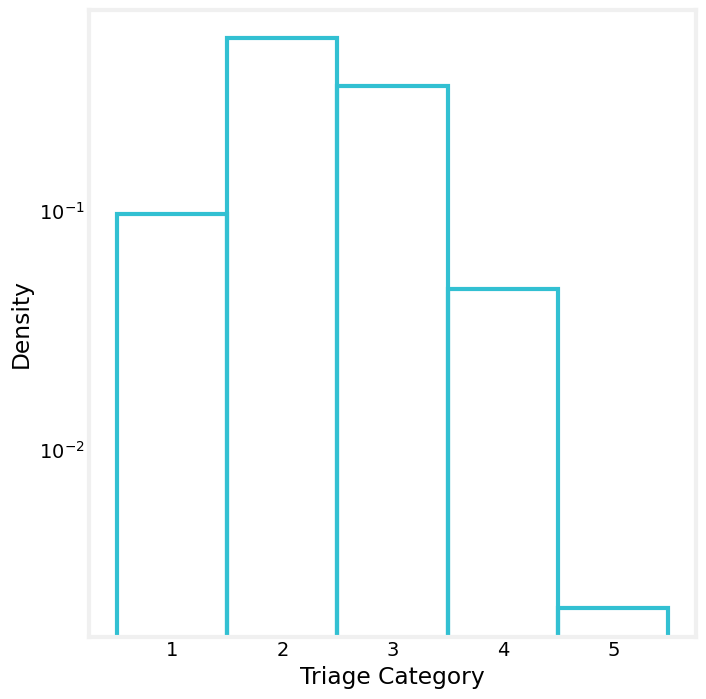

In [11]:
# tmp_df.head()
f, ax = plt.subplots(figsize=(7, 7))
f.tight_layout() 
ax.grid(False)

histGender = sns.histplot(data=tmp_df,x='TRIAGE_CATEGORY', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)
ax.set(xlabel='Triage Category')
plt.yscale("log")

In [12]:
tmp_df[['TRIAGE_CATEGORY']].value_counts()

TRIAGE_CATEGORY
2                  1444
3                   915
1                   267
4                   129
5                     6
Name: count, dtype: int64

In [13]:
visitGUIDs = list(tmp_df.VISITGUID.unique())

In [14]:
timing_df = EDVists_Summary_df.loc[EDVists_Summary_df.VISITGUID.isin(visitGUIDs)].copy() # visitGUIDs
timing_df['FIRSTTRIAGEVALUE'] = pd.to_numeric(timing_df['FIRSTTRIAGEVALUE'],errors='coerce')
timing_df['LASTTRIAGEVALUE'] = pd.to_numeric(timing_df['LASTTRIAGEVALUE'],errors='coerce')


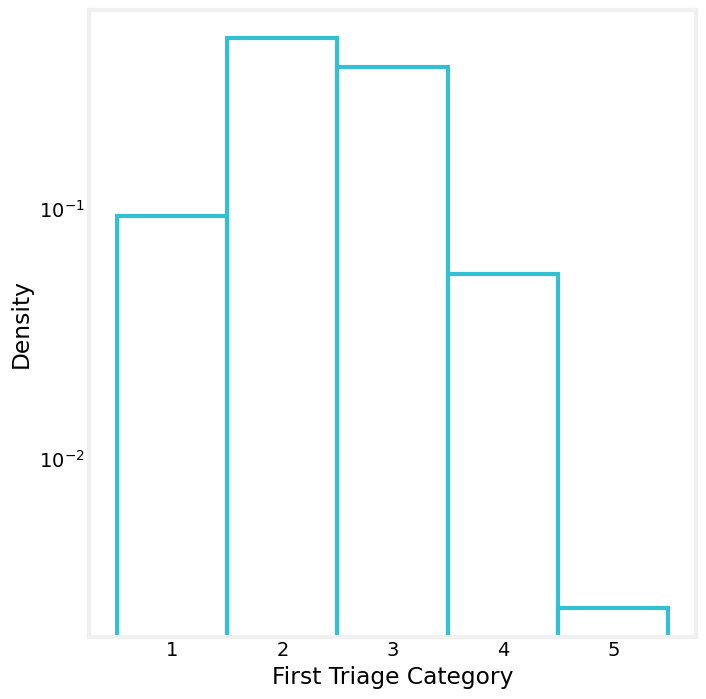

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
f.tight_layout() 
ax.grid(False)

hist1 = sns.histplot(ax=ax,data=timing_df,x='FIRSTTRIAGEVALUE', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)
# hist2 = sns.histplot(ax=ax,data=timing_df,x='LASTTRIAGEVALUE', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)

ax.set(xlabel='First Triage Category')
plt.yscale("log")

In [16]:
timing_df

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,AABCount,AABInVisit,RWTDtm,RWTTimeAfterAdmitMins,RWTCount,RWTInVisit,WFDDtm,WFDTimeAfterAdmitMins,WFDCount,WFDInVisit,CDUDtm,CDUTimeAfterAdmitMins,CDUCount,CDUInVisit,LoS,VISITGUID,FIRSTTRIAGEVALUE,LASTTRIAGEVALUE,HOSPITALID,GROUPCODE,DISCHARGEDISPOSITION,TREATMENTSTARTEDMINS,TreatmentStartedDtm,AdmissionRequestDtm,ADMISSIONREQUESTMINS,AGEONADMISSION,IPGROUPCODE,IPSUBGROUPCODE,IPLASTGROUPCODE,IPLASTSUBGROUPCODE,IPLOSHOURS,IPDISCHARGEDTM,TIPDiff,AABDiff,IPGrouping,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS
634,1595276500170,78146200200,2023-01-01 13:12:00+10:30,2023-01-01 23:20:00+10:30,2023-01-01 16:20:51.380000+10:30,188.856333,1,1,2023-01-01 18:23:03.250000+10:30,311.054167,1,1,2023-01-01 23:05:10.710000+10:30,593.178500,1,1,NaT,NaN,0,0,NaT,NaN,0,0,608.0,2183245300270,3,3,LMH,LMH-LEMER,ED02 Admit as Inpatient,188.0,2023-01-01 16:20:00+10:30,2023-01-01 18:23:00+10:30,311.0,86,LMH-LGMED,LMH IP General Medical / PURPLE,LMH-LGMED,LMH IP General Medical / PURPLE,146.0,2023-01-07 20:00:00+10:30,-0.856333,-0.054167,Medical,188.0,311.0,405.178500,123.0,297.0,14.821500
1018,1595359600170,155340400200,2023-01-01 18:18:00+10:30,2023-01-02 13:26:00+10:30,2023-01-01 18:34:12.077000+10:30,16.201283,1,1,2023-01-02 00:09:27.300000+10:30,351.455000,1,1,2023-01-02 05:00:48.133000+10:30,642.802217,1,1,NaT,NaN,0,0,NaT,NaN,0,0,1148.0,2183340800270,2,2,LMH,LMH-LEMER,ED02 Admit as Inpatient,16.0,2023-01-01 18:34:00+10:30,2023-01-02 00:09:00+10:30,351.0,52,LMH-LURO,LMH IP Urology / UROLOGY,LMH-LURO,LMH IP Urology / UROLOGY,377.0,2023-01-17 17:05:00+10:30,-0.201283,-0.455000,Medical,16.0,351.0,626.802217,335.0,797.0,505.197783
1353,1595428600170,56037100200,2023-01-01 23:07:00+10:30,2023-01-02 14:55:00+10:30,2023-01-02 00:04:17.397000+10:30,57.289950,1,1,2023-01-02 07:01:56.933000+10:30,474.948883,1,1,2023-01-02 11:02:16.020000+10:30,715.267000,1,1,NaT,NaN,0,0,NaT,NaN,0,0,948.0,2183420800270,3,3,RAH,RAH-EMERG,ED02 Admit as Inpatient,57.0,2023-01-02 00:04:00+10:30,2023-01-02 07:01:00+10:30,474.0,40,RAH-GENMED,RAH General Medical / 103,RAH-GENMED,RAH General Medical / 103,1039.0,2023-02-14 14:37:00+10:30,-0.289950,-0.948883,Medical,57.0,474.0,658.267000,417.0,474.0,232.733000
1570,1595466400170,31928000200,2023-01-02 05:51:00+10:30,2023-01-02 22:33:00+10:30,2023-01-02 06:22:20.947000+10:30,31.349117,1,1,2023-01-02 13:31:02.113000+10:30,460.035217,2,1,2023-01-02 13:31:36.630000+10:30,460.610500,2,1,NaT,NaN,0,0,NaT,NaN,0,0,1002.0,2183467500270,2,2,LMH,LMH-LEMER,ED02 Admit as Inpatient,31.0,2023-01-02 06:22:00+10:30,2023-01-02 13:31:00+10:30,460.0,73,LMH-LGMED,LMH IP General Medical / GREEN,LMH-LGMED,LMH IP General Medical / GREEN,198.0,2023-01-10 19:20:00+10:30,-0.349117,-0.035217,Medical,31.0,460.0,429.610500,429.0,542.0,541.389500
1647,1595477000170,20507100200,2023-01-02 08:13:00+10:30,2023-01-02 17:05:00+10:30,2023-01-02 08:20:48.147000+10:30,7.802450,1,1,2023-01-02 10:32:50.903000+10:30,139.848383,1,1,2023-01-02 13:45:28.187000+10:30,332.469783,1,1,NaT,NaN,0,0,NaT,NaN,0,0,532.0,2183479900270,2,2,FMC,FMC-EMER,ED02 Admit as Inpatient,7.0,2023-01-02 08:20:00+10:30,2023-01-02 10:32:00+10:30,139.0,79,FMC-GENMED,FMC IP General Medical / GMF4,FMC-GENMED,FMC IP General Medical / GMF4,207.0,2023-01-11 01:00:00+10:30,-0.802450,-0.848383,Medical,7.0,139.0,325.469783,132.0,393.0,199.530217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468517,1890201400170,43035300200,2023-12-30 20:20:00+10:30,2023-12-31 05:00:00+10:30,2023-12-30 23:16:57.350000+10:30,176.955833,1,1,2023-12-31 01:02:34.470000+10:30,282.574500,1,1,2023-12-31 04:29:49.497000+10:30,489.824950,1,1,NaT,NaN,0,0,NaT,NaN,0,0,520.0,268283680

In [17]:
groupBy = 'FIRSTTRIAGEVALUE'
counts=timing_df[['VISITGUID',groupBy]].groupby(groupBy).count()
counts.rename(columns={'VISITGUID':'Presentations'},inplace=True)

waitingTime = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).mean().round(0).astype('Int64')
waitingTime.rename(columns={'TIPTimeAfterAdmitMins':'Waiting Time (min)'}, inplace=True)
waitingTimeMax = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).max().round(0).astype('Int64')
waitingTimeMax.rename(columns={'TIPTimeAfterAdmitMins':'Maximum Waiting Time (min)'}, inplace=True)

countMoreThan2Hours = timing_df[( timing_df.TIPTimeAfterAdmitMins>120)][['VISITGUID',groupBy]].groupby(groupBy).count()
countMoreThan2Hours.rename(columns={'VISITGUID':'Waited more than 2 hours for treatment'},inplace=True)

TriageChanges = timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE][['VISITGUID',groupBy]].groupby(groupBy).count()
TriageChanges.rename(columns={'VISITGUID':'Triage Level Changed'},inplace=True)


Sepsis_Presentations = pd.concat((counts,TriageChanges,waitingTime,waitingTimeMax,countMoreThan2Hours),axis=1)
Sepsis_Presentations['Fraction Triage Level Changed'] =  (Sepsis_Presentations['Triage Level Changed']/Sepsis_Presentations['Presentations']).round(2)
Sepsis_Presentations = Sepsis_Presentations[['Presentations', 'Triage Level Changed','Fraction Triage Level Changed', 'Waiting Time (min)','Maximum Waiting Time (min)','Waited more than 2 hours for treatment']]
Sepsis_Presentations.index.name = 'First Triage Category'

Sepsis_Presentations

,Presentations,Triage Level Changed,Fraction Triage Level Changed,Waiting Time (min),Maximum Waiting Time (min),Waited more than 2 hours for treatment
First Triage Category,,,,,,
1,258,2,0.01,17,201,1
2,1327,17,0.01,29,556,37
3,1018,122,0.12,139,891,415
4,151,24,0.16,162,676,76
5,7,1,0.14,178,378,4


In [18]:
# timing_df.TIPDiff.mean()

In [19]:
timing_df[(timing_df.FIRSTTRIAGEVALUE==1)  &( timing_df.TIPTimeAfterAdmitMins>60)]

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,AABCount,AABInVisit,RWTDtm,RWTTimeAfterAdmitMins,RWTCount,RWTInVisit,WFDDtm,WFDTimeAfterAdmitMins,WFDCount,WFDInVisit,CDUDtm,CDUTimeAfterAdmitMins,CDUCount,CDUInVisit,LoS,VISITGUID,FIRSTTRIAGEVALUE,LASTTRIAGEVALUE,HOSPITALID,GROUPCODE,DISCHARGEDISPOSITION,TREATMENTSTARTEDMINS,TreatmentStartedDtm,AdmissionRequestDtm,ADMISSIONREQUESTMINS,AGEONADMISSION,IPGROUPCODE,IPSUBGROUPCODE,IPLASTGROUPCODE,IPLASTSUBGROUPCODE,IPLOSHOURS,IPDISCHARGEDTM,TIPDiff,AABDiff,IPGrouping,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS
59789,1631546100170,84291800200,2023-02-17 13:16:00+10:30,2023-02-17 19:53:00+10:30,2023-02-17 14:35:58.423000+10:30,79.973717,1,1,2023-02-17 16:29:34.343000+10:30,193.572383,1,1,2023-02-17 18:43:46.373000+10:30,327.772883,1,1,NaT,NaN,0,0,NaT,NaN,0,0,397.0,2243435300270,1,1,LMH,LMH-LEMER,ED02 Admit as Inpatient,0.0,2023-02-17 13:16:00+10:30,2023-02-17 16:29:00+10:30,193.0,94,LMH-LGMED,LMH IP General Medical / BLUE,LMH-LGMED,LMH IP General Medical / BLUE,230.0,2023-02-27 06:23:00+10:30,-79.973717,-0.572383,Medical,0.0,193.0,327.772883,193.0,204.0,69.227117
74869,1640435100170,4480100200,2023-03-01 00:44:00+10:30,2023-03-01 05:22:00+10:30,2023-03-01 02:40:30.113000+10:30,116.501883,1,1,2023-03-01 03:46:47.990000+10:30,182.799833,1,1,2023-03-01 05:07:18.197000+10:30,263.303283,1,1,NaT,NaN,0,0,NaT,NaN,0,0,278.0,2258162700270,1,1,LMH,LMH-LEMER,ED02 Admit as Inpatient,0.0,2023-03-01 00:44:00+10:30,2023-03-01 03:46:00+10:30,182.0,41,LMH-LGMED,LMH IP General Medical / WHITE,LMH-LGMED,LMH IP General Medical / WHITE,18.0,2023-03-01 21:30:00+10:30,-116.501883,-0.799833,Medical,0.0,182.0,263.303283,182.0,96.0,14.696717
207885,1723301000170,90451600200,2023-06-11 15:32:00+09:30,2023-06-12 11:50:00+09:30,2023-06-11 17:12:47.937000+09:30,100.798950,1,1,2023-06-11 18:06:27.653000+09:30,154.460883,1,1,2023-06-11 21:02:24.657000+09:30,330.410950,1,1,NaT,NaN,0,0,NaT,NaN,0,0,1218.0,2396240500270,1,1,LMH,LMH-LEMER,ED02 Admit as Inpatient,0.0,2023-06-11 15:32:00+09:30,2023-06-11 18:06:00+09:30,154.0,84,LMH-LAMU,LMH IP Acute Medical Unit / AMU A,LMH-LAMU,LMH IP Acute Medical Unit / AMU A,22.0,2023-06-13 09:02:00+09:30,-100.798950,-0.460883,Medical,0.0,154.0,330.410950,154.0,1064.0,887.589050
277271,1768690200170,314037900200,2023-08-04 17:20:00+09:30,2023-08-05 19:15:00+09:30,2023-08-04 20:41:20.970000+09:30,201.349500,1,1,2023-08-05 00:11:30.077000+09:30,411.501283,1,1,2023-08-05 01:39:09.200000+09:30,499.153333,1,1,NaT,NaN,0,0,NaT,NaN,0,0,1555.0,2473416500270,1,2,LMH,LMH-LEMER,ED02 Admit as Inpatient,14.0,2023-08-04 17:34:00+09:30,2023-08-05 00:11:00+09:30,411.0,72,LMH-LSTRO,LMH IP Stroke / STROKE,LMH-LSTRO,LMH IP Stroke / STROKE,495.0,2023-08-25 15:31:00+09:30,-187.349500,-0.501283,Medical,14.0,411.0,485.153333,397.0,1144.0,1055.846667
358275,1819985700170,126504700200,2023-10-06 09:35:00+10:30,2023-10-06 23:51:00+10:30,2023-10-06 11:30:35.527000+10:30,115.592117,1,1,2023-10-06 13:22:28.933000+10:30,227.482217,1,1,2023-10-06 21:40:26.260000+10:30,725.437667,1,1,NaT,NaN,0,0,NaT,NaN,0,0,856.0,2561900200270,1,1,MPH,MPH-MEMER,ED02 Admit as Inpatient,0.0,2023-10-06 09:35:00+10:30,2023-10-06 13:22:00+10:30,227.0,91,MPH-MGMED,MPH IP General Medical / MED1,MPH-MGMED,MPH IP General Medical / MED1,87.0,2023-10-10 04:40:00+10:30,-115.592117,-0.482217,Medical,0.0,227.0,725.437667,227.0,629.0,130.562333
362264,1821976200170,61726200200,2023-10-09 13:29:00+10:30,2023-10-09 23:18:00+10:30,2023-10-09 14:36:26.523000+10:30,67.442050,1,1,2023-10-09 16:13:44.053000+10:30,164.734217,1,1,2023-10-09 17:30:28.167000+10:30,241.469450,1,1,NaT,NaN,0,0,NaT,NaN,0,0,589.0,2565130000270,1,1,LMH,LMH-LEMER,ED02 Admit as Inpatient,0.0,2023-10-09 13:29:00+10:30,2023-10-09 16:13:00+10:30,164.0,99,LMH-LGMED,LMH IP General Medical / BLUE,LMH-LGMED,LMH IP General Medical / BLUE,1

In [20]:
Sepsis_Presentations.columns

Index(['Presentations', 'Triage Level Changed',
       'Fraction Triage Level Changed', 'Waiting Time (min)',
       'Maximum Waiting Time (min)', 'Waited more than 2 hours for treatment'],
      dtype='object')

In [21]:
timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE]['HOSPITALID'].value_counts()

HOSPITALID
FMC    77
RAH    40
LMH    18
QEH    12
MPH    11
NHS     8
Name: count, dtype: int64

In [22]:
timing_df.head()

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,AABCount,AABInVisit,RWTDtm,RWTTimeAfterAdmitMins,RWTCount,RWTInVisit,WFDDtm,WFDTimeAfterAdmitMins,WFDCount,WFDInVisit,CDUDtm,CDUTimeAfterAdmitMins,CDUCount,CDUInVisit,LoS,VISITGUID,FIRSTTRIAGEVALUE,LASTTRIAGEVALUE,HOSPITALID,GROUPCODE,DISCHARGEDISPOSITION,TREATMENTSTARTEDMINS,TreatmentStartedDtm,AdmissionRequestDtm,ADMISSIONREQUESTMINS,AGEONADMISSION,IPGROUPCODE,IPSUBGROUPCODE,IPLASTGROUPCODE,IPLASTSUBGROUPCODE,IPLOSHOURS,IPDISCHARGEDTM,TIPDiff,AABDiff,IPGrouping,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS
634,1595276500170,78146200200,2023-01-01 13:12:00+10:30,2023-01-01 23:20:00+10:30,2023-01-01 16:20:51.380000+10:30,188.856333,1,1,2023-01-01 18:23:03.250000+10:30,311.054167,1,1,2023-01-01 23:05:10.710000+10:30,593.178500,1,1,NaT,NaN,0,0,NaT,NaN,0,0,608.0,2183245300270,3,3,LMH,LMH-LEMER,ED02 Admit as Inpatient,188.0,2023-01-01 16:20:00+10:30,2023-01-01 18:23:00+10:30,311.0,86,LMH-LGMED,LMH IP General Medical / PURPLE,LMH-LGMED,LMH IP General Medical / PURPLE,146.0,2023-01-07 20:00:00+10:30,-0.856333,-0.054167,Medical,188.0,311.0,405.178500,123.0,297.0,14.821500
1018,1595359600170,155340400200,2023-01-01 18:18:00+10:30,2023-01-02 13:26:00+10:30,2023-01-01 18:34:12.077000+10:30,16.201283,1,1,2023-01-02 00:09:27.300000+10:30,351.455000,1,1,2023-01-02 05:00:48.133000+10:30,642.802217,1,1,NaT,NaN,0,0,NaT,NaN,0,0,1148.0,2183340800270,2,2,LMH,LMH-LEMER,ED02 Admit as Inpatient,16.0,2023-01-01 18:34:00+10:30,2023-01-02 00:09:00+10:30,351.0,52,LMH-LURO,LMH IP Urology / UROLOGY,LMH-LURO,LMH IP Urology / UROLOGY,377.0,2023-01-17 17:05:00+10:30,-0.201283,-0.455000,Medical,16.0,351.0,626.802217,335.0,797.0,505.197783
1353,1595428600170,56037100200,2023-01-01 23:07:00+10:30,2023-01-02 14:55:00+10:30,2023-01-02 00:04:17.397000+10:30,57.289950,1,1,2023-01-02 07:01:56.933000+10:30,474.948883,1,1,2023-01-02 11:02:16.020000+10:30,715.267000,1,1,NaT,NaN,0,0,NaT,NaN,0,0,948.0,2183420800270,3,3,RAH,RAH-EMERG,ED02 Admit as Inpatient,57.0,2023-01-02 00:04:00+10:30,2023-01-02 07:01:00+10:30,474.0,40,RAH-GENMED,RAH General Medical / 103,RAH-GENMED,RAH General Medical / 103,1039.0,2023-02-14 14:37:00+10:30,-0.289950,-0.948883,Medical,57.0,474.0,658.267000,417.0,474.0,232.733000
1570,1595466400170,31928000200,2023-01-02 05:51:00+10:30,2023-01-02 22:33:00+10:30,2023-01-02 06:22:20.947000+10:30,31.349117,1,1,2023-01-02 13:31:02.113000+10:30,460.035217,2,1,2023-01-02 13:31:36.630000+10:30,460.610500,2,1,NaT,NaN,0,0,NaT,NaN,0,0,1002.0,2183467500270,2,2,LMH,LMH-LEMER,ED02 Admit as Inpatient,31.0,2023-01-02 06:22:00+10:30,2023-01-02 13:31:00+10:30,460.0,73,LMH-LGMED,LMH IP General Medical / GREEN,LMH-LGMED,LMH IP General Medical / GREEN,198.0,2023-01-10 19:20:00+10:30,-0.349117,-0.035217,Medical,31.0,460.0,429.610500,429.0,542.0,541.389500
1647,1595477000170,20507100200,2023-01-02 08:13:00+10:30,2023-01-02 17:05:00+10:30,2023-01-02 08:20:48.147000+10:30,7.802450,1,1,2023-01-02 10:32:50.903000+10:30,139.848383,1,1,2023-01-02 13:45:28.187000+10:30,332.469783,1,1,NaT,NaN,0,0,NaT,NaN,0,0,532.0,2183479900270,2,2,FMC,FMC-EMER,ED02 Admit as Inpatient,7.0,2023-01-02 08:20:00+10:30,2023-01-02 10:32:00+10:30,139.0,79,FMC-GENMED,FMC IP General Medical / GMF4,FMC-GENMED,FMC IP General Medical / GMF4,207.0,2023-01-11 01:00:00+10:30,-0.802450,-0.848383,Medical,7.0,139.0,325.469783,132.0,393.0,199.530217


In [23]:
timing_df.columns

Index(['ChartGUID', 'ClientGUID', 'AdmitDtm', 'DischargeDtm', 'TIPDtm',
       'TIPTimeAfterAdmitMins', 'TIPCount', 'TIPInVisit', 'AABDtm',
       'AABTimeAfterAdmitMins', 'AABCount', 'AABInVisit', 'RWTDtm',
       'RWTTimeAfterAdmitMins', 'RWTCount', 'RWTInVisit', 'WFDDtm',
       'WFDTimeAfterAdmitMins', 'WFDCount', 'WFDInVisit', 'CDUDtm',
       'CDUTimeAfterAdmitMins', 'CDUCount', 'CDUInVisit', 'LoS', 'VISITGUID',
       'FIRSTTRIAGEVALUE', 'LASTTRIAGEVALUE', 'HOSPITALID', 'GROUPCODE',
       'DISCHARGEDISPOSITION', 'TREATMENTSTARTEDMINS', 'TreatmentStartedDtm',
       'AdmissionRequestDtm', 'ADMISSIONREQUESTMINS', 'AGEONADMISSION',
       'IPGROUPCODE', 'IPSUBGROUPCODE', 'IPLASTGROUPCODE',
       'IPLASTSUBGROUPCODE', 'IPLOSHOURS', 'IPDISCHARGEDTM', 'TIPDiff',
       'AABDiff', 'IPGrouping', 'CleanTreatmentTime', 'CleanAdmissionTime',
       'CleanRealTreatmentTime', 'TimeTreatToAdmissionRequest',
       'TimeAdmissionRequestToEoS', 'TimeRWTToEoS'],
      dtype='object')

In [24]:
timing_df['PreviousEDPresentationDays'] = None 

In [25]:
for vGUID in visitGUIDs: 
# vGUID = visitGUIDs[i]
    # print(vGUID)

    clientGUID = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].CLIENTGUID.values[0]
    # print(clientGUID)
    admitDTM = (Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].ADMITDTM.values[0])
    # print(admitDTM)
    # Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].ADMITDTM.dtypes
    rowidx = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].index.values[0]
    row = Emergency_IPInfo_Complete_Numeric.loc[rowidx]
    tmp_df = Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.CLIENTGUID==clientGUID)&(Emergency_IPInfo_Complete_Numeric.ADMITDTM<row['ADMITDTM'])].copy()
    tmp_df.sort_values(by='ADMITDTM', inplace=True,ascending=False)

    # print(timing_df.loc[timing_df.VISITGUID==vGUID].AdmitDtm  )
    timing_df.loc[timing_df.VISITGUID==vGUID , 'PreviousEDPresentationDays'] = ((row['ADMITDTM'] - tmp_df.DISCHARGEDTM)/np.timedelta64(1, 'D')).min()

In [26]:
timing_df.loc[timing_df.VISITGUID==vGUID]

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,AABCount,AABInVisit,RWTDtm,RWTTimeAfterAdmitMins,RWTCount,RWTInVisit,WFDDtm,WFDTimeAfterAdmitMins,WFDCount,WFDInVisit,CDUDtm,CDUTimeAfterAdmitMins,CDUCount,CDUInVisit,LoS,VISITGUID,FIRSTTRIAGEVALUE,LASTTRIAGEVALUE,HOSPITALID,GROUPCODE,DISCHARGEDISPOSITION,TREATMENTSTARTEDMINS,TreatmentStartedDtm,AdmissionRequestDtm,ADMISSIONREQUESTMINS,AGEONADMISSION,IPGROUPCODE,IPSUBGROUPCODE,IPLASTGROUPCODE,IPLASTSUBGROUPCODE,IPLOSHOURS,IPDISCHARGEDTM,TIPDiff,AABDiff,IPGrouping,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS,PreviousEDPresentationDays
283517,1772330000170,314283400200,2023-08-09 15:34:00+09:30,2023-08-09 17:20:00+09:30,2023-08-09 15:38:10.020000+09:30,4.167,1,1,NaT,NaN,0,0,NaT,NaN,0,0,NaT,NaN,0,0,NaT,NaN,0,0,106.0,2479654600270,2,2,NHS,NHS-EMERG,ED06 Transfer to Other Hospital,4.0,2023-08-09 15:38:00+09:30,NaT,NaN,0,None,None,None,None,NaN,NaT,-0.167,NaN,None,4.0,NaN,102.0,NaN,NaN,NaN,NaN


In [27]:
tmp_df

,CLIENTGUID,CHARTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,GENDERCODE,IndiginousStatus,HOSIPTALPROXY,ADMITDTM,DISCHARGEDTM,LOSNIGHTS,LOSHOUR,ADMITSOURCE,ADMITTYPE,EPISODEOFCARE,SOURCEOFREFERRAL,DISCHARGEDISPOSITION,TRIAGE_CATEGORY,EDDIAGNOSISCODE,EDDIAGNOSISCODEDESCRIPTION,DIAGNOSIS_LIST,HA_DIAGNOSIS_LIST,JOURNEYLOS,InitialIPLoS,GROUPCODE,CURRENTLOCATION,SepsisFlag,COPDFlag,PneumoniaFlag,PEFlag,HeartFailureFlag,UTIFlag,HASepsisFlag,ED_VISIT_REASON,SOBFlag,FirstBloodGlucose,FirstBPDiastolic,FirstBPSystolic,FirstGCSScoreAdult,FirstLevelofConsciousness,FirstO2Flow,FirstPulseRateBPM,FirstRespiration,FirstSpO2,FirstTemperatureDegreesC,FirstWeightKg,FirstUrinalysisBlood,FirstUrinalysisLeukocytes,FirstPainAssessment,FirstBloodGlucoseDtm,FirstBPDiastolicDtm,FirstBPSystolicDtm,FirstGCSScoreAdultDtm,FirstLevelofConsciousnessDtm,FirstO2FlowDtm,FirstPulseRateBPMDtm,FirstRespirationDtm,FirstSpO2Dtm,FirstTemperatureDegreesCDtm,FirstWeightKgDtm,FirstUrinalysisBloodDtm,FirstUrinalysisLeukocytesDtm,FirstPainAssessmentDtm,FirstEstimatedGlomerularFiltrationRate,FirstCreatinine,FirstAlbumin,FirstTotalBilirubin,FirstAlkalinePhosphatase,FirstAlanineAminotransferase,FirstAspartateAminotransferase,FirstGammaGlutamylTransferase,FirstLactateDehydrogenase,FirstHaemoglobin,FirstWhiteCellCount,FirstPlateletCount,FirstNeutrophils,FirstDDimer,FirstCreactiveprotein,FirstTroponinT,FirstNTproBNP,First50pOxygenSaturationVenous,FirstAnionGapVenous,FirstBaseExcessVenous,FirstBilirubinVenous,FirstCarboxyhaemoglobinVenous,FirstChlorideDirectVenous,FirstCreatinineVenous,FirstGlucoseVenous,FirstIonised Calcium Venous,FirstLactateVenous,FirstMethaemoglobinVenous,FirstOxygenSaturationVenous,FirstOxyhaemoglobinVenous,FirstpCO2Venous,FirstpHVenous,FirstpO2Venous,FirstPotassiumDirectVenous,FirstReducedHaemoglobinVenous,FirstSodiumDirectVenous,FirstTotalHaemoglobinVenous,First50pOxygenSaturationArterial,FirstAnionGapArterial,FirstBaseExcessArterial,FirstBicarbonateCalculatedArterial,FirstBilirubinArterial,FirstCarboxyhaemoglobinArterial,FirstChlorideDirectArterial,FirstCreatinineArterial,FirstGlucoseArterial,FirstIonised Calcium Arterial,FirstLactateArterial,FirstMethaemoglobinArterial,FirstOxygenSaturationArterial,FirstOxyhaemoglobinArterial,FirstpCO2Arterial,FirstpHArterial,FirstpO2Arterial,FirstPotassiumDirectArterial,FirstReducedHaemoglobinArterial,FirstSodiumDirectArterial,FirstTotalHaemoglobinArterial,FirstEstimatedGlomerularFiltrationRateDtm,FirstCreatinineDtm,FirstAlbuminDtm,FirstTotalBilirubinDtm,FirstAlkalinePhosphataseDtm,FirstAlanineAminotransferaseDtm,FirstAspartateAminotransferaseDtm,FirstGammaGlutamylTransferaseDtm,FirstLactateDehydrogenaseDtm,FirstHaemoglobinDtm,FirstWhiteCellCountDtm,FirstPlateletCountDtm,FirstNeutrophilsDtm,FirstDDimerDtm,FirstCreactiveproteinDtm,FirstTroponinTDtm,FirstNTproBNPDtm,First50pOxygenSaturationVenousDtm,FirstAnionGapVenousDtm,FirstBaseExcessVenousDtm,FirstBilirubinVenousDtm,FirstCarboxyhaemoglobinVenousDtm,FirstChlorideDirectVenousDtm,FirstCreatinineVenousDtm,FirstGlucoseVenousDtm,FirstIonised Calcium VenousDtm,FirstLactateVenousDtm,FirstMethaemoglobinVenousDtm,FirstOxygenSaturationVenousDtm,FirstOxyhaemoglobinVenousDtm,FirstpCO2VenousDtm,FirstpHVenousDtm,FirstpO2VenousDtm,FirstPotassiumDirectVenousDtm,FirstReducedHaemoglobinVenousDtm,FirstSodiumDirectVenousDtm,FirstTotalHaemoglobinVenousDtm,First50pOxygenSaturationArterialDtm,FirstAnionGapArterialDtm,FirstBaseExcessArterialDtm,FirstBicarbonateCalculatedArterialDtm,FirstBilirubinArterialDtm,FirstCarboxyhaemoglobinArterialDtm,FirstChlorideDirectArterialDtm,FirstCreatinineArterialDtm,FirstGlucoseArterialDtm,FirstIonised Calcium ArterialDtm,FirstLactateArterialDtm,FirstMethaemoglobinArterialDtm,FirstOxygenSaturationArterialDtm,FirstOxyhaemoglobinArterialDtm,FirstpCO2ArterialDtm,FirstpHArterialDtm,FirstpO2ArterialDtm,FirstPotassiumDirectArterialDtm,FirstReducedHaemoglobinArterialDtm,FirstSodiumDirectArterialDtm,FirstTotalHaemoglobinArterialDtm,IndiginousFlag


In [28]:
interesting_visits = list(timing_df[timing_df.PreviousEDPresentationDays<2].VISITGUID.unique())

In [29]:
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID.isin(interesting_visits)].head()

,CLIENTGUID,CHARTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,GENDERCODE,IndiginousStatus,HOSIPTALPROXY,ADMITDTM,DISCHARGEDTM,LOSNIGHTS,LOSHOUR,ADMITSOURCE,ADMITTYPE,EPISODEOFCARE,SOURCEOFREFERRAL,DISCHARGEDISPOSITION,TRIAGE_CATEGORY,EDDIAGNOSISCODE,EDDIAGNOSISCODEDESCRIPTION,DIAGNOSIS_LIST,HA_DIAGNOSIS_LIST,JOURNEYLOS,InitialIPLoS,GROUPCODE,CURRENTLOCATION,SepsisFlag,COPDFlag,PneumoniaFlag,PEFlag,HeartFailureFlag,UTIFlag,HASepsisFlag,ED_VISIT_REASON,SOBFlag,FirstBloodGlucose,FirstBPDiastolic,FirstBPSystolic,FirstGCSScoreAdult,FirstLevelofConsciousness,FirstO2Flow,FirstPulseRateBPM,FirstRespiration,FirstSpO2,FirstTemperatureDegreesC,FirstWeightKg,FirstUrinalysisBlood,FirstUrinalysisLeukocytes,FirstPainAssessment,FirstBloodGlucoseDtm,FirstBPDiastolicDtm,FirstBPSystolicDtm,FirstGCSScoreAdultDtm,FirstLevelofConsciousnessDtm,FirstO2FlowDtm,FirstPulseRateBPMDtm,FirstRespirationDtm,FirstSpO2Dtm,FirstTemperatureDegreesCDtm,FirstWeightKgDtm,FirstUrinalysisBloodDtm,FirstUrinalysisLeukocytesDtm,FirstPainAssessmentDtm,FirstEstimatedGlomerularFiltrationRate,FirstCreatinine,FirstAlbumin,FirstTotalBilirubin,FirstAlkalinePhosphatase,FirstAlanineAminotransferase,FirstAspartateAminotransferase,FirstGammaGlutamylTransferase,FirstLactateDehydrogenase,FirstHaemoglobin,FirstWhiteCellCount,FirstPlateletCount,FirstNeutrophils,FirstDDimer,FirstCreactiveprotein,FirstTroponinT,FirstNTproBNP,First50pOxygenSaturationVenous,FirstAnionGapVenous,FirstBaseExcessVenous,FirstBilirubinVenous,FirstCarboxyhaemoglobinVenous,FirstChlorideDirectVenous,FirstCreatinineVenous,FirstGlucoseVenous,FirstIonised Calcium Venous,FirstLactateVenous,FirstMethaemoglobinVenous,FirstOxygenSaturationVenous,FirstOxyhaemoglobinVenous,FirstpCO2Venous,FirstpHVenous,FirstpO2Venous,FirstPotassiumDirectVenous,FirstReducedHaemoglobinVenous,FirstSodiumDirectVenous,FirstTotalHaemoglobinVenous,First50pOxygenSaturationArterial,FirstAnionGapArterial,FirstBaseExcessArterial,FirstBicarbonateCalculatedArterial,FirstBilirubinArterial,FirstCarboxyhaemoglobinArterial,FirstChlorideDirectArterial,FirstCreatinineArterial,FirstGlucoseArterial,FirstIonised Calcium Arterial,FirstLactateArterial,FirstMethaemoglobinArterial,FirstOxygenSaturationArterial,FirstOxyhaemoglobinArterial,FirstpCO2Arterial,FirstpHArterial,FirstpO2Arterial,FirstPotassiumDirectArterial,FirstReducedHaemoglobinArterial,FirstSodiumDirectArterial,FirstTotalHaemoglobinArterial,FirstEstimatedGlomerularFiltrationRateDtm,FirstCreatinineDtm,FirstAlbuminDtm,FirstTotalBilirubinDtm,FirstAlkalinePhosphataseDtm,FirstAlanineAminotransferaseDtm,FirstAspartateAminotransferaseDtm,FirstGammaGlutamylTransferaseDtm,FirstLactateDehydrogenaseDtm,FirstHaemoglobinDtm,FirstWhiteCellCountDtm,FirstPlateletCountDtm,FirstNeutrophilsDtm,FirstDDimerDtm,FirstCreactiveproteinDtm,FirstTroponinTDtm,FirstNTproBNPDtm,First50pOxygenSaturationVenousDtm,FirstAnionGapVenousDtm,FirstBaseExcessVenousDtm,FirstBilirubinVenousDtm,FirstCarboxyhaemoglobinVenousDtm,FirstChlorideDirectVenousDtm,FirstCreatinineVenousDtm,FirstGlucoseVenousDtm,FirstIonised Calcium VenousDtm,FirstLactateVenousDtm,FirstMethaemoglobinVenousDtm,FirstOxygenSaturationVenousDtm,FirstOxyhaemoglobinVenousDtm,FirstpCO2VenousDtm,FirstpHVenousDtm,FirstpO2VenousDtm,FirstPotassiumDirectVenousDtm,FirstReducedHaemoglobinVenousDtm,FirstSodiumDirectVenousDtm,FirstTotalHaemoglobinVenousDtm,First50pOxygenSaturationArterialDtm,FirstAnionGapArterialDtm,FirstBaseExcessArterialDtm,FirstBicarbonateCalculatedArterialDtm,FirstBilirubinArterialDtm,FirstCarboxyhaemoglobinArterialDtm,FirstChlorideDirectArterialDtm,FirstCreatinineArterialDtm,FirstGlucoseArterialDtm,FirstIonised Calcium ArterialDtm,FirstLactateArterialDtm,FirstMethaemoglobinArterialDtm,FirstOxygenSaturationArterialDtm,FirstOxyhaemoglobinArterialDtm,FirstpCO2ArterialDtm,FirstpHArterialDtm,FirstpO2ArterialDtm,FirstPotassiumDirectArterialDtm,FirstReducedHaemoglobinArterialDtm,FirstSodiumDirectArterialDtm,FirstTotalHaemoglobinArterialDtm,IndiginousFlag
5257,21456600200,1733435

In [30]:
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.CLIENTGUID==38194900200]

,CLIENTGUID,CHARTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,GENDERCODE,IndiginousStatus,HOSIPTALPROXY,ADMITDTM,DISCHARGEDTM,LOSNIGHTS,LOSHOUR,ADMITSOURCE,ADMITTYPE,EPISODEOFCARE,SOURCEOFREFERRAL,DISCHARGEDISPOSITION,TRIAGE_CATEGORY,EDDIAGNOSISCODE,EDDIAGNOSISCODEDESCRIPTION,DIAGNOSIS_LIST,HA_DIAGNOSIS_LIST,JOURNEYLOS,InitialIPLoS,GROUPCODE,CURRENTLOCATION,SepsisFlag,COPDFlag,PneumoniaFlag,PEFlag,HeartFailureFlag,UTIFlag,HASepsisFlag,ED_VISIT_REASON,SOBFlag,FirstBloodGlucose,FirstBPDiastolic,FirstBPSystolic,FirstGCSScoreAdult,FirstLevelofConsciousness,FirstO2Flow,FirstPulseRateBPM,FirstRespiration,FirstSpO2,FirstTemperatureDegreesC,FirstWeightKg,FirstUrinalysisBlood,FirstUrinalysisLeukocytes,FirstPainAssessment,FirstBloodGlucoseDtm,FirstBPDiastolicDtm,FirstBPSystolicDtm,FirstGCSScoreAdultDtm,FirstLevelofConsciousnessDtm,FirstO2FlowDtm,FirstPulseRateBPMDtm,FirstRespirationDtm,FirstSpO2Dtm,FirstTemperatureDegreesCDtm,FirstWeightKgDtm,FirstUrinalysisBloodDtm,FirstUrinalysisLeukocytesDtm,FirstPainAssessmentDtm,FirstEstimatedGlomerularFiltrationRate,FirstCreatinine,FirstAlbumin,FirstTotalBilirubin,FirstAlkalinePhosphatase,FirstAlanineAminotransferase,FirstAspartateAminotransferase,FirstGammaGlutamylTransferase,FirstLactateDehydrogenase,FirstHaemoglobin,FirstWhiteCellCount,FirstPlateletCount,FirstNeutrophils,FirstDDimer,FirstCreactiveprotein,FirstTroponinT,FirstNTproBNP,First50pOxygenSaturationVenous,FirstAnionGapVenous,FirstBaseExcessVenous,FirstBilirubinVenous,FirstCarboxyhaemoglobinVenous,FirstChlorideDirectVenous,FirstCreatinineVenous,FirstGlucoseVenous,FirstIonised Calcium Venous,FirstLactateVenous,FirstMethaemoglobinVenous,FirstOxygenSaturationVenous,FirstOxyhaemoglobinVenous,FirstpCO2Venous,FirstpHVenous,FirstpO2Venous,FirstPotassiumDirectVenous,FirstReducedHaemoglobinVenous,FirstSodiumDirectVenous,FirstTotalHaemoglobinVenous,First50pOxygenSaturationArterial,FirstAnionGapArterial,FirstBaseExcessArterial,FirstBicarbonateCalculatedArterial,FirstBilirubinArterial,FirstCarboxyhaemoglobinArterial,FirstChlorideDirectArterial,FirstCreatinineArterial,FirstGlucoseArterial,FirstIonised Calcium Arterial,FirstLactateArterial,FirstMethaemoglobinArterial,FirstOxygenSaturationArterial,FirstOxyhaemoglobinArterial,FirstpCO2Arterial,FirstpHArterial,FirstpO2Arterial,FirstPotassiumDirectArterial,FirstReducedHaemoglobinArterial,FirstSodiumDirectArterial,FirstTotalHaemoglobinArterial,FirstEstimatedGlomerularFiltrationRateDtm,FirstCreatinineDtm,FirstAlbuminDtm,FirstTotalBilirubinDtm,FirstAlkalinePhosphataseDtm,FirstAlanineAminotransferaseDtm,FirstAspartateAminotransferaseDtm,FirstGammaGlutamylTransferaseDtm,FirstLactateDehydrogenaseDtm,FirstHaemoglobinDtm,FirstWhiteCellCountDtm,FirstPlateletCountDtm,FirstNeutrophilsDtm,FirstDDimerDtm,FirstCreactiveproteinDtm,FirstTroponinTDtm,FirstNTproBNPDtm,First50pOxygenSaturationVenousDtm,FirstAnionGapVenousDtm,FirstBaseExcessVenousDtm,FirstBilirubinVenousDtm,FirstCarboxyhaemoglobinVenousDtm,FirstChlorideDirectVenousDtm,FirstCreatinineVenousDtm,FirstGlucoseVenousDtm,FirstIonised Calcium VenousDtm,FirstLactateVenousDtm,FirstMethaemoglobinVenousDtm,FirstOxygenSaturationVenousDtm,FirstOxyhaemoglobinVenousDtm,FirstpCO2VenousDtm,FirstpHVenousDtm,FirstpO2VenousDtm,FirstPotassiumDirectVenousDtm,FirstReducedHaemoglobinVenousDtm,FirstSodiumDirectVenousDtm,FirstTotalHaemoglobinVenousDtm,First50pOxygenSaturationArterialDtm,FirstAnionGapArterialDtm,FirstBaseExcessArterialDtm,FirstBicarbonateCalculatedArterialDtm,FirstBilirubinArterialDtm,FirstCarboxyhaemoglobinArterialDtm,FirstChlorideDirectArterialDtm,FirstCreatinineArterialDtm,FirstGlucoseArterialDtm,FirstIonised Calcium ArterialDtm,FirstLactateArterialDtm,FirstMethaemoglobinArterialDtm,FirstOxygenSaturationArterialDtm,FirstOxyhaemoglobinArterialDtm,FirstpCO2ArterialDtm,FirstpHArterialDtm,FirstpO2ArterialDtm,FirstPotassiumDirectArterialDtm,FirstReducedHaemoglobinArterialDtm,FirstSodiumDirectArterialDtm,FirstTotalHaemoglobinArterialDtm,IndiginousFlag
11217,38194900200,167822